**Load necessary modules**

In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import microscope as mcr
import matplotlib.pyplot as plt
import pandas as pd
import sample as sm
import ignore as ig

**Run scopes**

In [2]:
save_folder = '../data/L63-microscope-linear-to-good-m'
D, D_r = 3, 300
Lyapunov_time, dt = 1./.91, 0.02
error_threshold = 0.05
beta = 4e-5
L0, L1 = 0.4, 3.5

L63_data_folder = '../data/L63-trajectories'
train = np.load('{}/train.npy'.format(L63_data_folder))
test = np.load('{}/test.npy'.format(L63_data_folder))[:100]
scope = mcr.MicroscopeExtremeToGood('../data/L63-microscope-extreme-to-good-m', D, D_r, beta, error_threshold, train, test, dt, Lyapunov_time, L0, L1)
# scope.run()

In [3]:
viewerl = mcr.MicroscopeLinearToGoodViewer(save_folder, 20)
viewerl.view1(limits=[-5., 5.])

interactive(children=(IntSlider(value=0, description='good rows', layout=Layout(width='1100px'), max=299), Out…

In [4]:
viewerl.view2(limits=[-0.5, 0.5])

interactive(children=(IntSlider(value=0, continuous_update=False, description='good rows', layout=Layout(width…

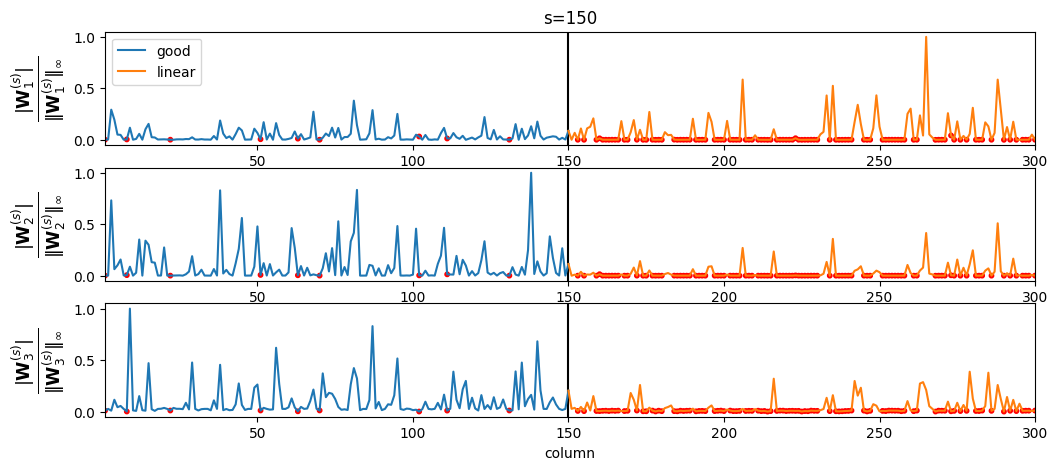

In [5]:
l = 150
c0 = u'#1f77b4'
c1 = u'#ff7f0e'
l0 = 'good'
l1 = 'linear'
limits = [-1., 1.]
viewerl.plot3(l, c0, c1, l0, l1, limits, file_path=f'../data/plots/l2g_{l}.png')

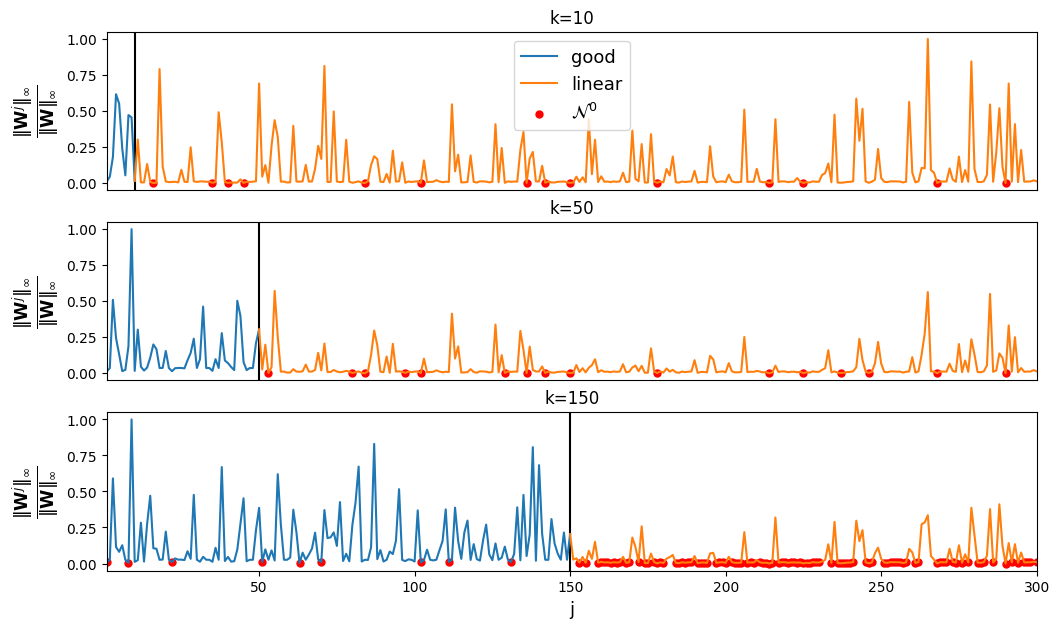

In [6]:
viewerl.plot5([10, 50, 150], c0, c1, l0, l1, limits, file_path=f'../data/plots/l2g_10_50_150.png')

In [7]:
viewer = mcr.MicroscopeExtremeToGoodViewer('../data/L63-microscope-extreme-to-good-m', 20)
viewer.view2(limits=[-5, 5])

interactive(children=(IntSlider(value=0, continuous_update=False, description='good rows', layout=Layout(width…

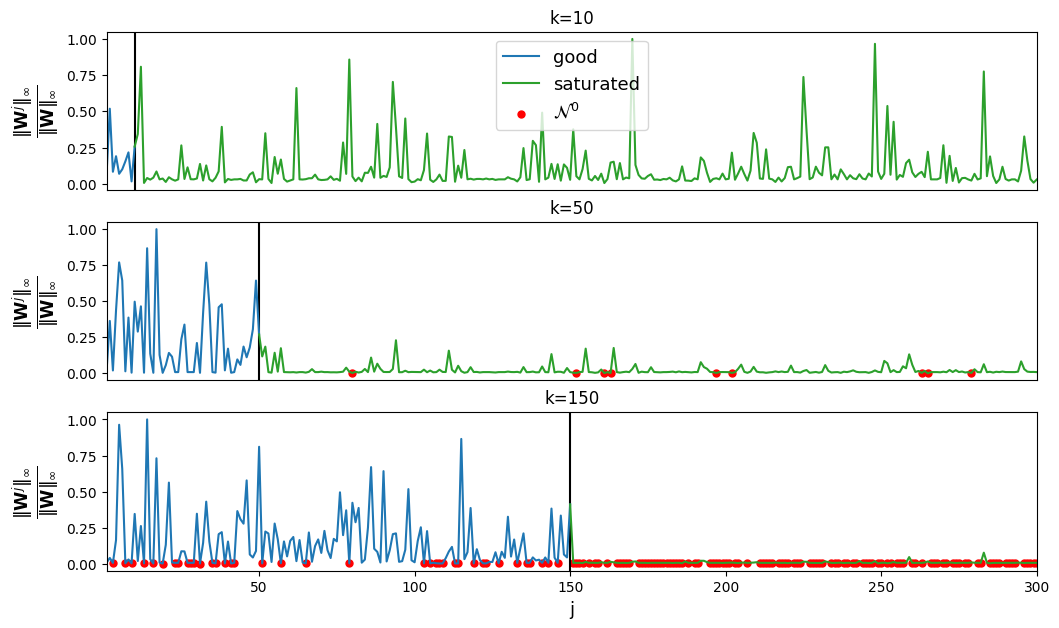

In [13]:
l = [10, 50, 150]
c1 = u'#1f77b4' # u'#1f77b4', u'#ff7f0e', u'#2ca02c'
c0 = u'#2ca02c'
l0 = 'good'
l1 = 'saturated'
limits = [-1, 1]
viewer.plot5(l, c1, c0, l0, l1, limits, file_path=f'../data/plots/s2g_{l}.png')

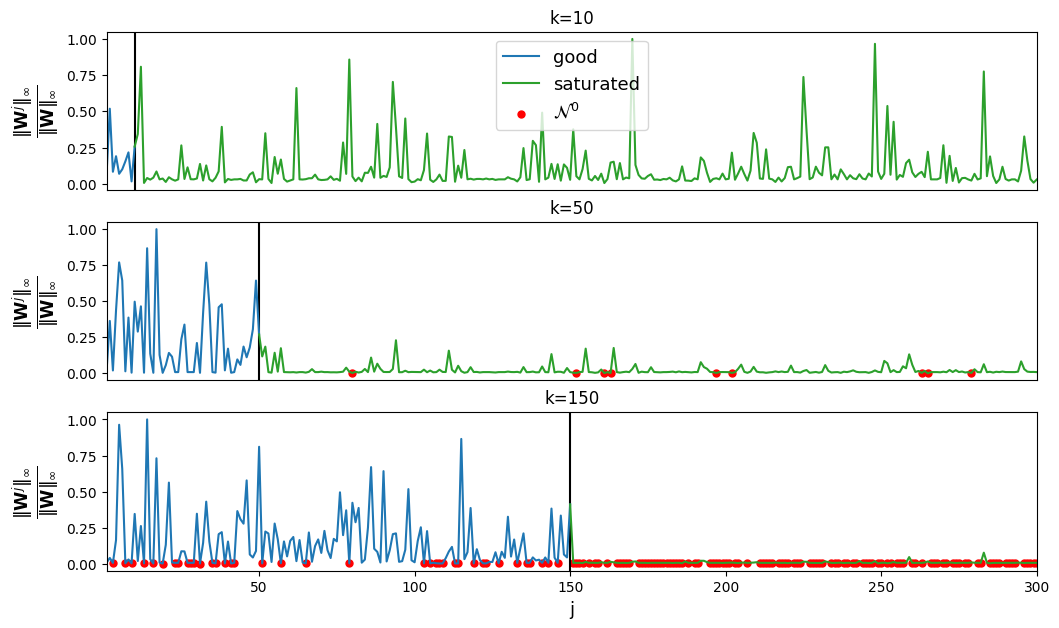

In [14]:
viewer.plot5([10, 50, 150], c1, c0, l0, l1, limits, file_path=f'../data/plots/s2g_10_50_150.png')

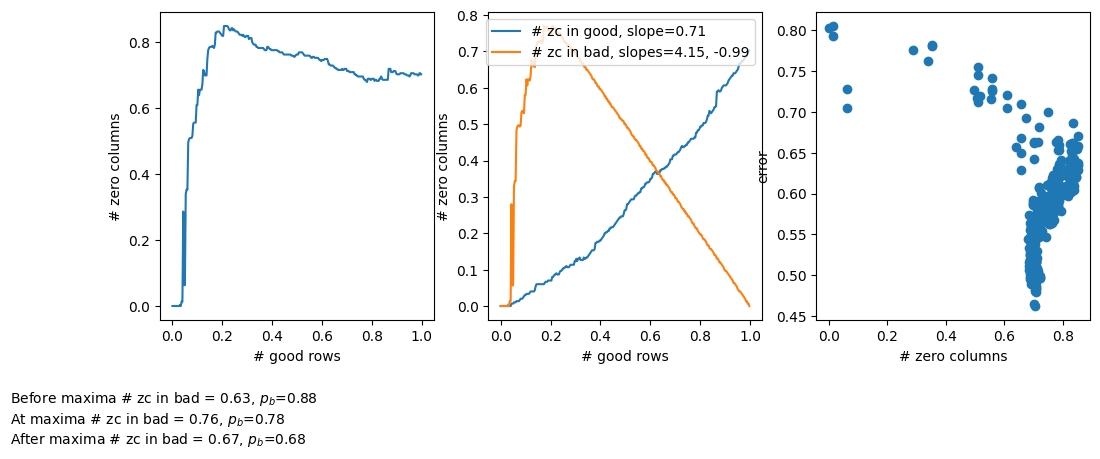

In [10]:
viewer.zc_vs_good([-10, 10])

/var/folders/v9/pbbcbpgd4mj4sbplbm4ht36r0000gq/T/ipykernel_11485/869646115.py:15: RuntimeWarning: invalid value encountered in divide
  y = (max_b/max_g)[h:-k]


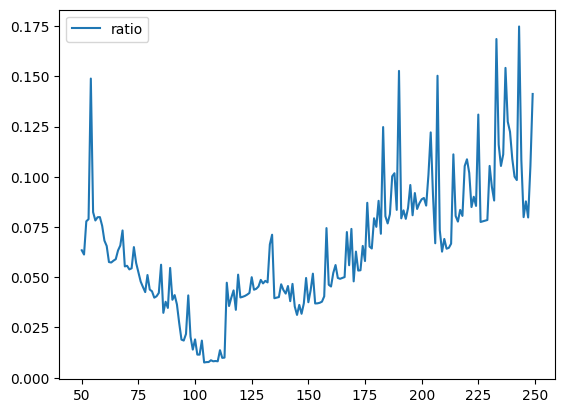

In [11]:
h = 50

max_g = np.zeros(viewer.D_r)
max_b = np.zeros(viewer.D_r)
mean = np.zeros(viewer.D_r)

for i in range(h, viewer.D_r):
    W = np.abs(viewer.get_W(i))
    W /= np.max(W, axis=1)[:, np.newaxis]
    
    # print([max(W[j, :i] / c[j]) for j in range(3)])
    max_g[i] = (np.mean(W[0, :i])) #max([max(W[j, :i] / c[j]) for j in range(3)])
    max_b[i] = (np.mean(W[0, i:]))#max([max(W[j, i:] / c[j]) for j in range(3)])
k = 50
y = (max_b/max_g)[h:-k]
plt.plot(range(h, viewer.D_r-k), y, label='ratio')
# plt.plot(range(h, viewer.D_r), max_b, label='max bad')
plt.legend()

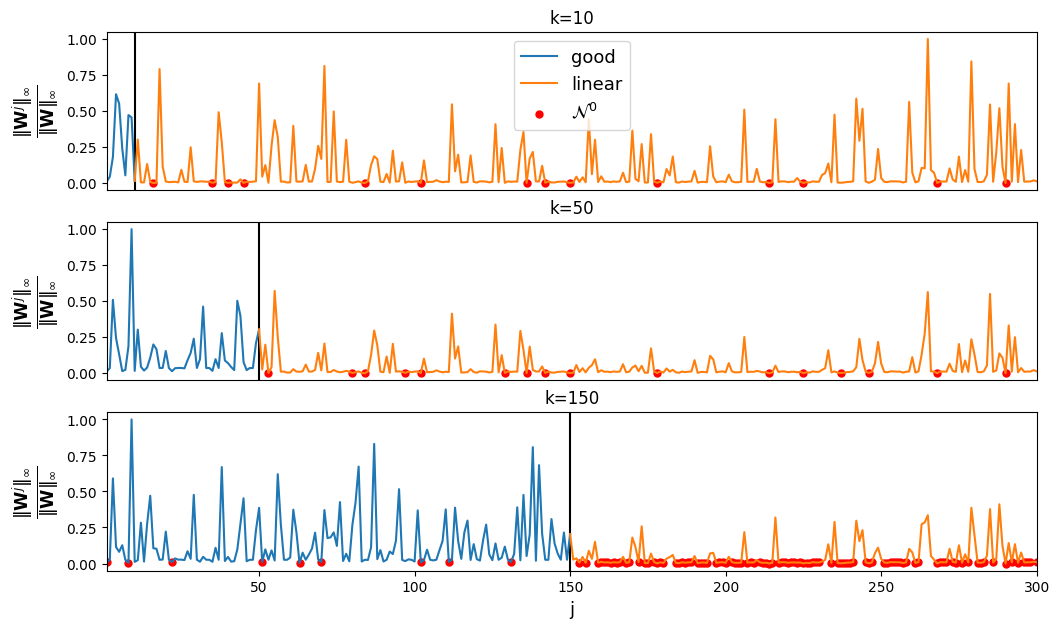

In [12]:
l = [10, 50, 150]
c0 = u'#1f77b4'
c1 = u'#ff7f0e'
l0 = 'good'
l1 = 'linear'
limits = [-1., 1.]
viewerl.plot5(l, c0, c1, l0, l1, limits, file_path=f'../data/plots/l2g_{l}.png')